# Calculate Free Cash Flow

## Setup

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
# Import libraries
import pandas as pd
import numpy as np

from investing.config.file_paths import input_data, output_data, financial_statements
from investing.tools.functions import data_loader, plot_financials, sensitivity_plot

# Plottting libraries
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline
%config InlineBackend.figure_format ='retina'

<IPython.core.display.Javascript object>

## Configure

In [4]:
# File names
companies_file = "company_names.csv"
multiples_file = "Multiples.xlsx"
ratios_file = "Ratios.xlsx"
start_file = "start_data_financials.csv"

<IPython.core.display.Javascript object>

## Load Data

In [5]:
# Load company names
df_names = pd.read_csv(input_data / companies_file)

<IPython.core.display.Javascript object>

In [6]:
df_financial = df_names[df_names["type"] == "Financial"].sort_values("ticker")
df_financial

,ticker,name,type
10,BK,Bank of New York Mellon Corporation,Financial
11,BLK,BlackRock,Financial
12,BMO,Bank of Montreal,Financial
13,BNS,Bank of Nova Scotia,Financial
15,BRK-B,Berkshire Hathaway,Financial
27,JPM,JPMorgan,Financial
30,MFC,Manulife,Financial
31,MKL,Markel,Financial
39,SLF,SunLife,Financial


<IPython.core.display.Javascript object>

## Build Company Data

In [7]:
company_data = {}
all_data = {}
for name in df_financial["ticker"]:
    all_data[name] = {
        'book_value': data_loader(financial_statements / multiples_file, name, statement_type='multiples'),
        'return_equity': data_loader(financial_statements / ratios_file, name, statement_type= 'ratios') 
    }
    company_data[name] = data_loader(financial_statements / multiples_file, name, statement_type='multiples')


<IPython.core.display.Javascript object>

## Plot Book Value and ROE

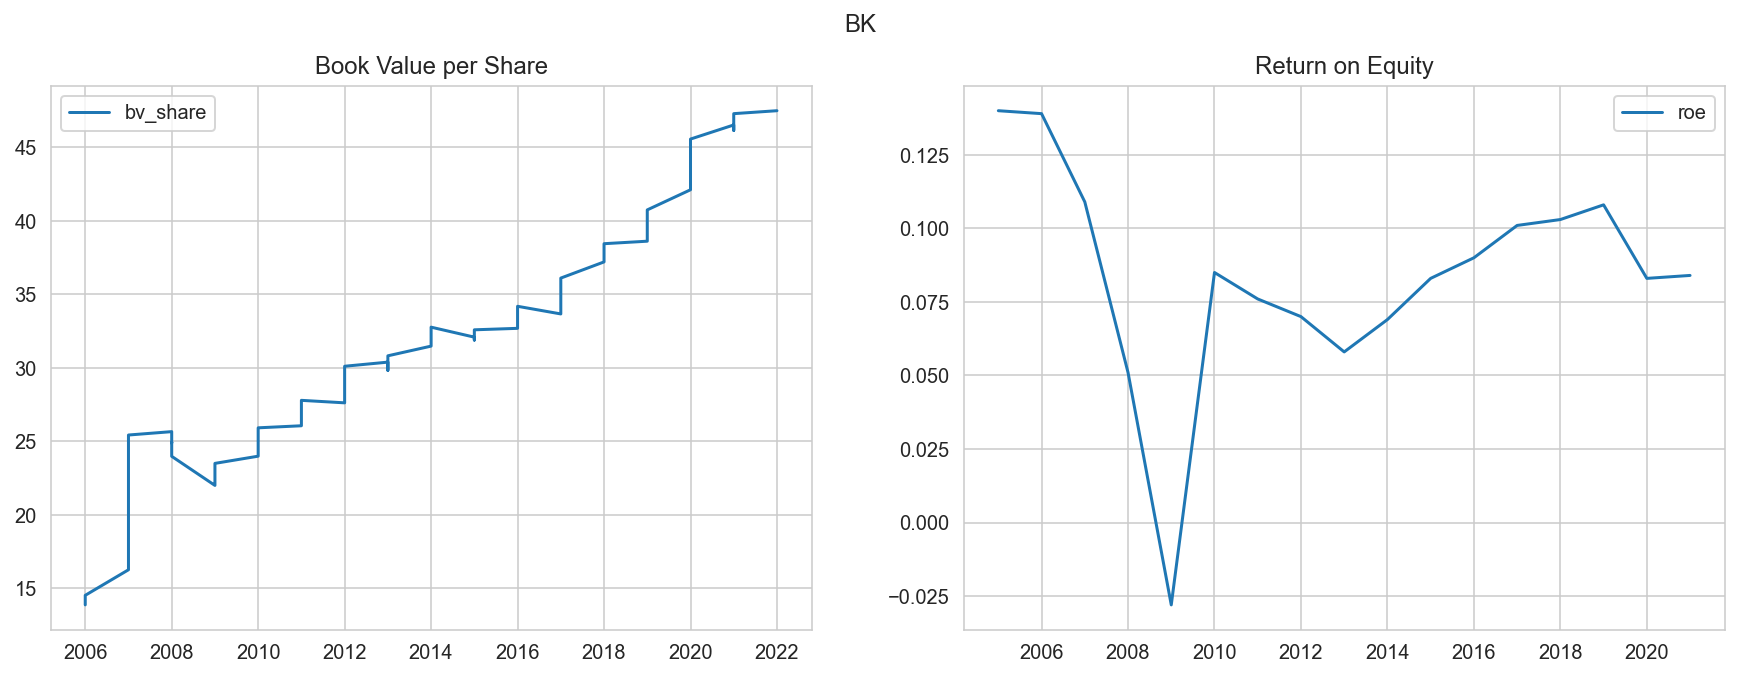

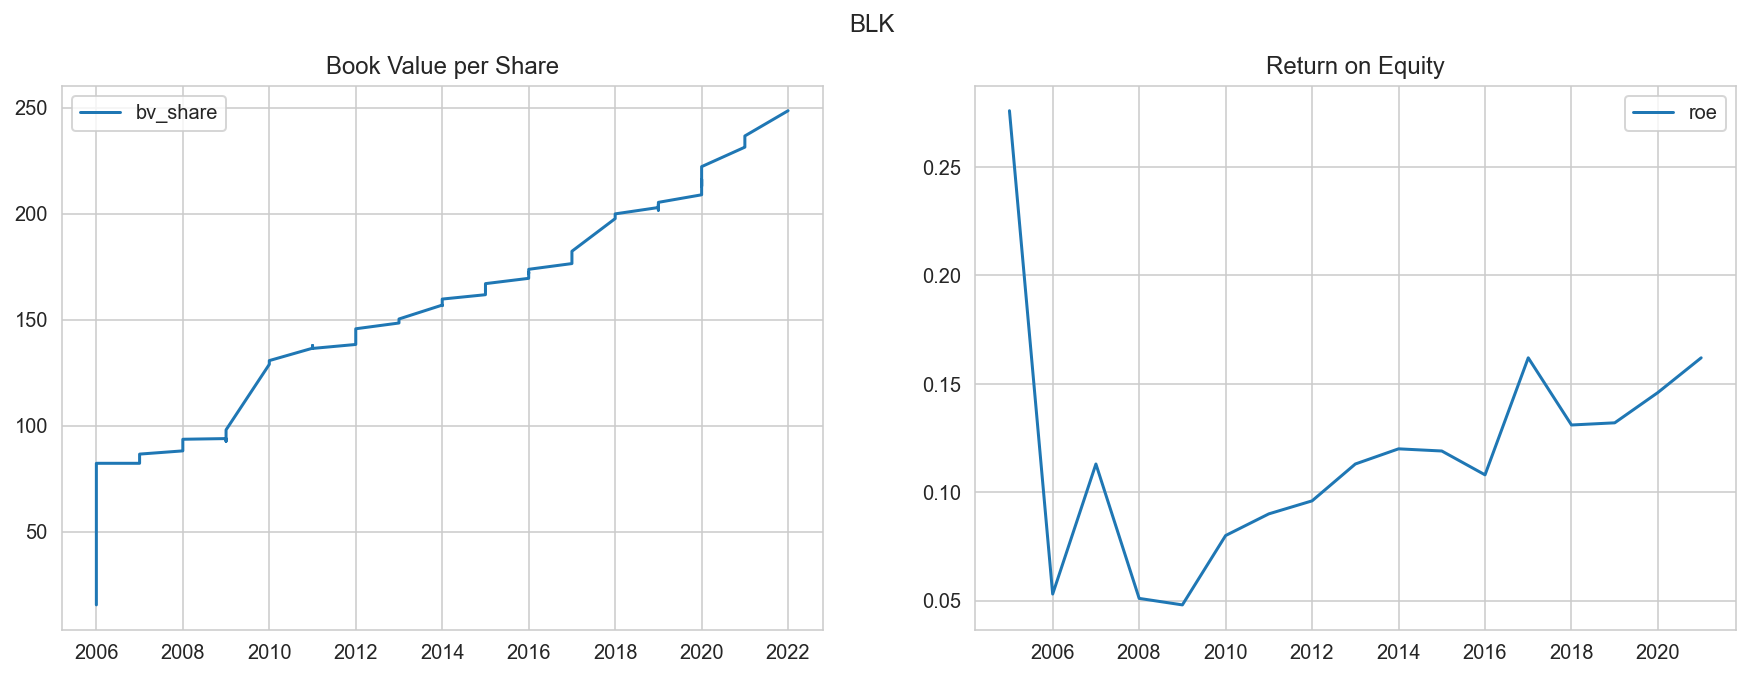

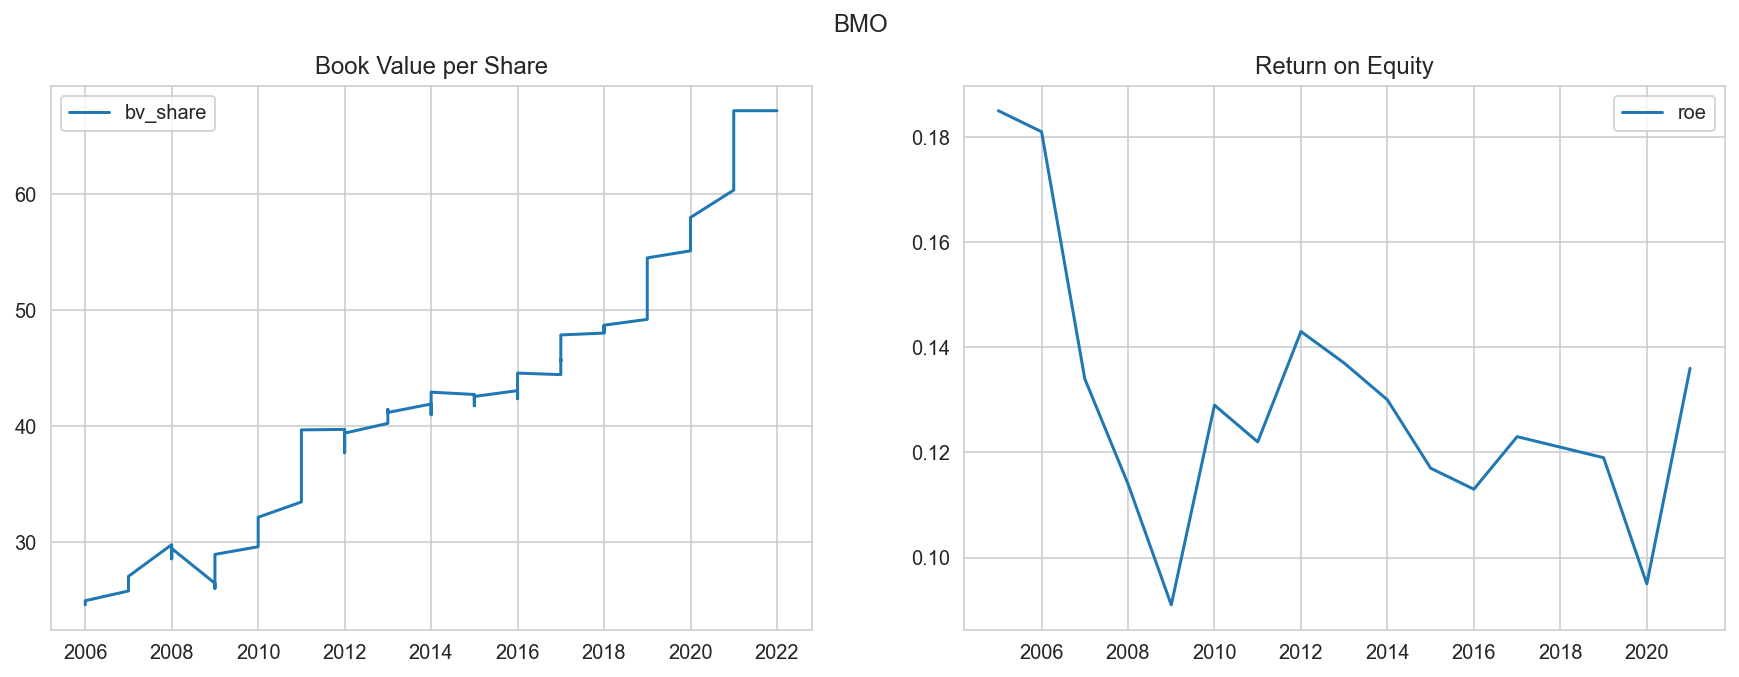

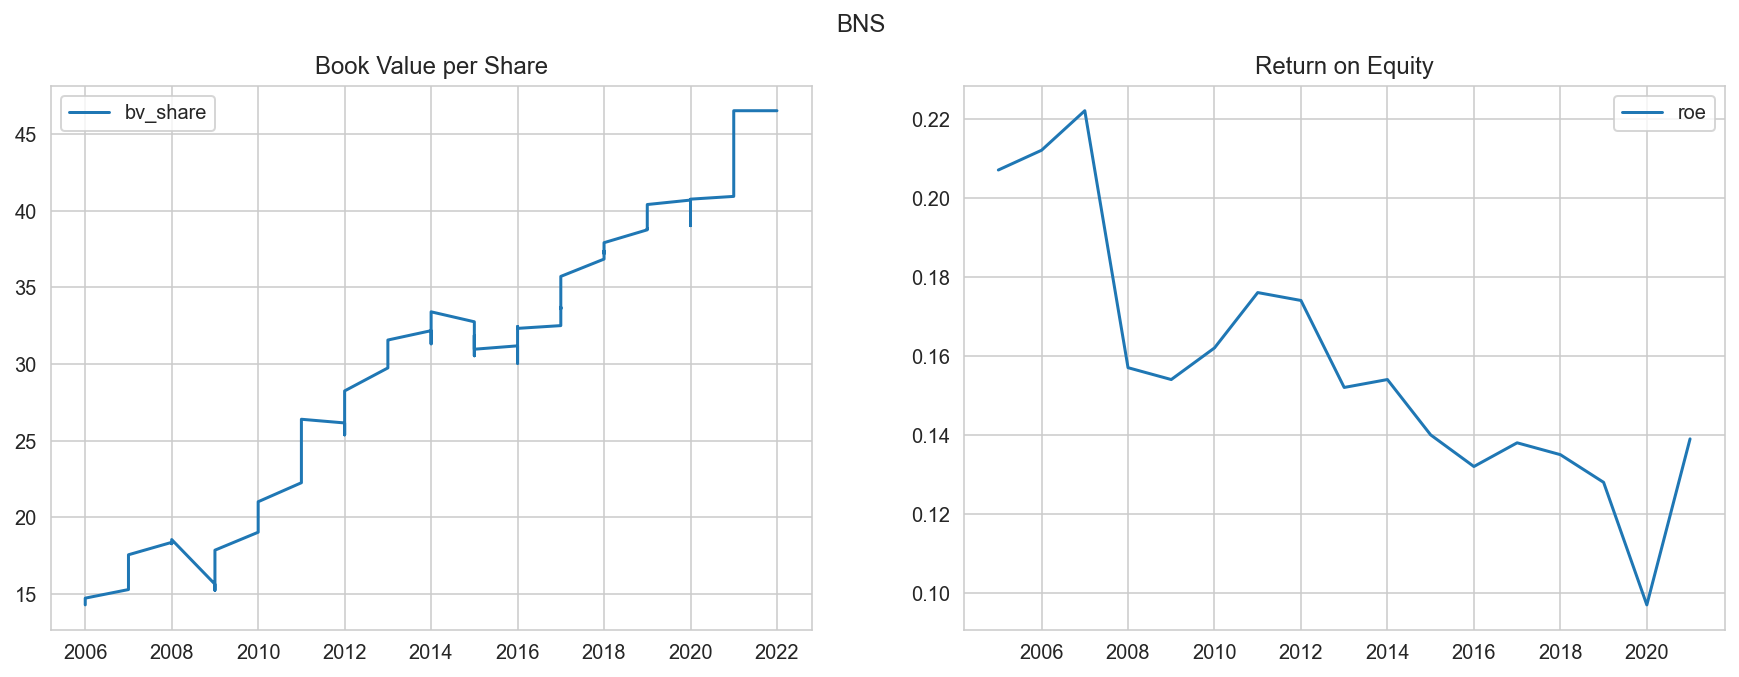

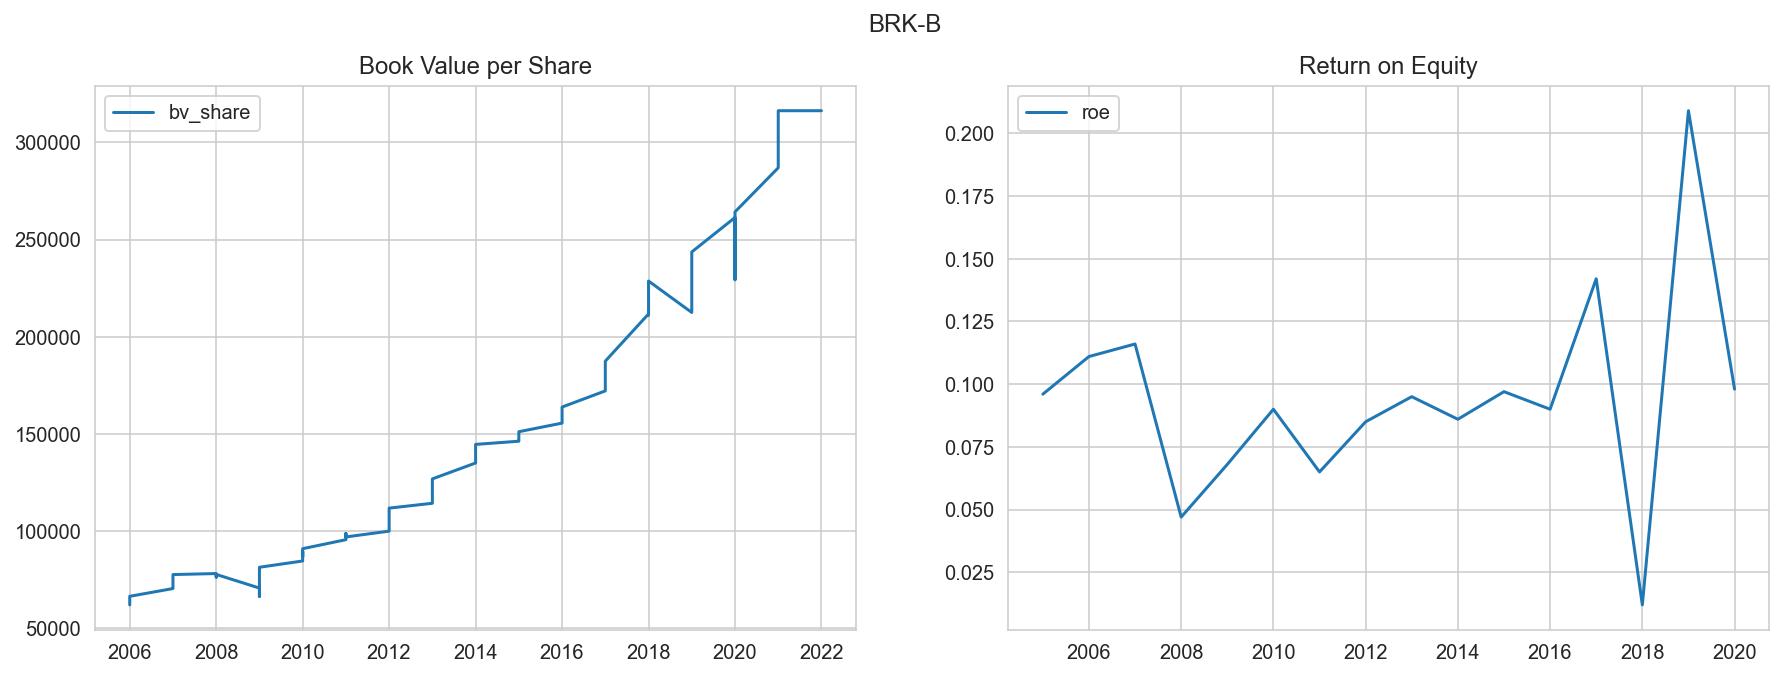

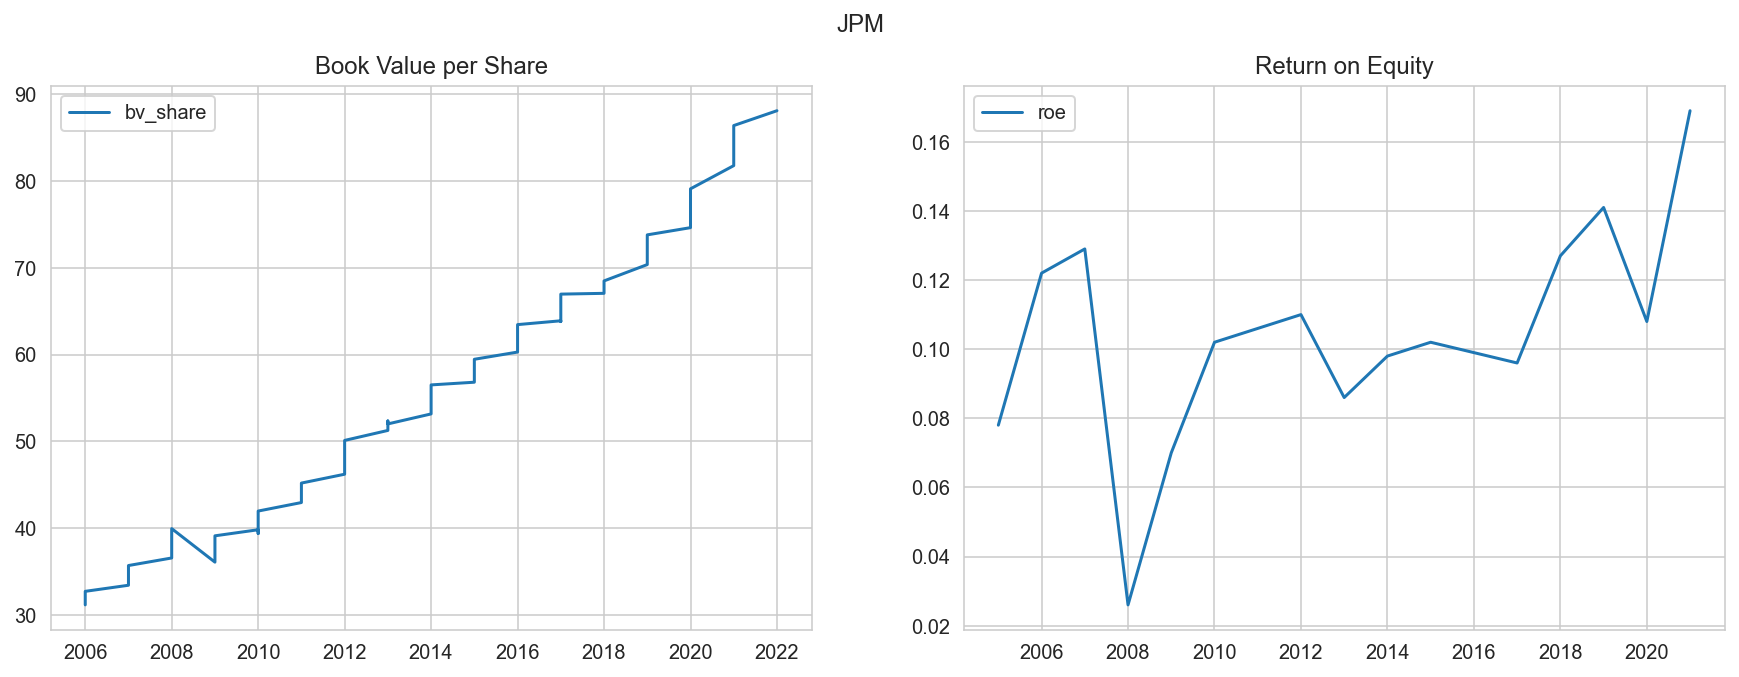

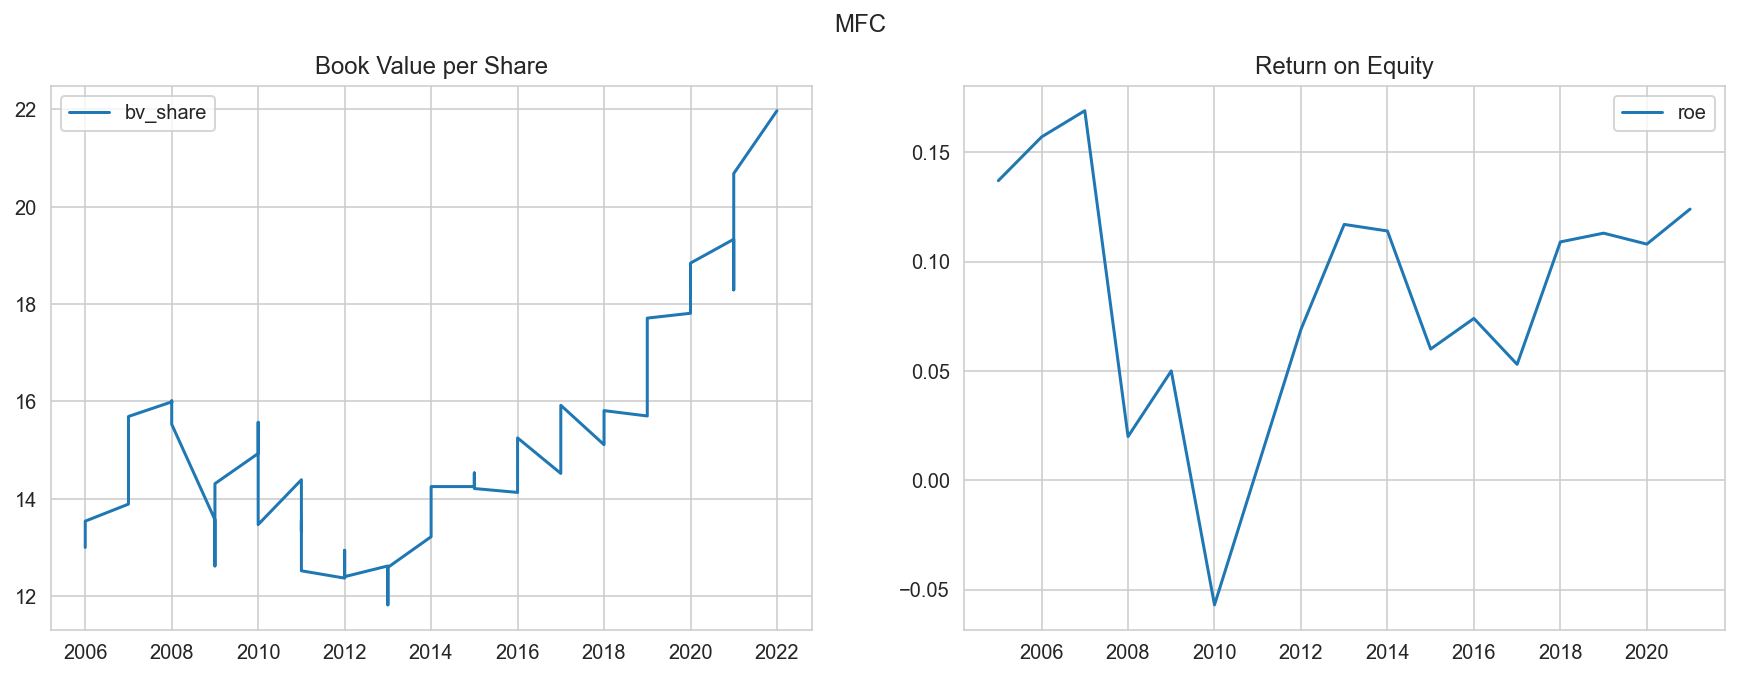

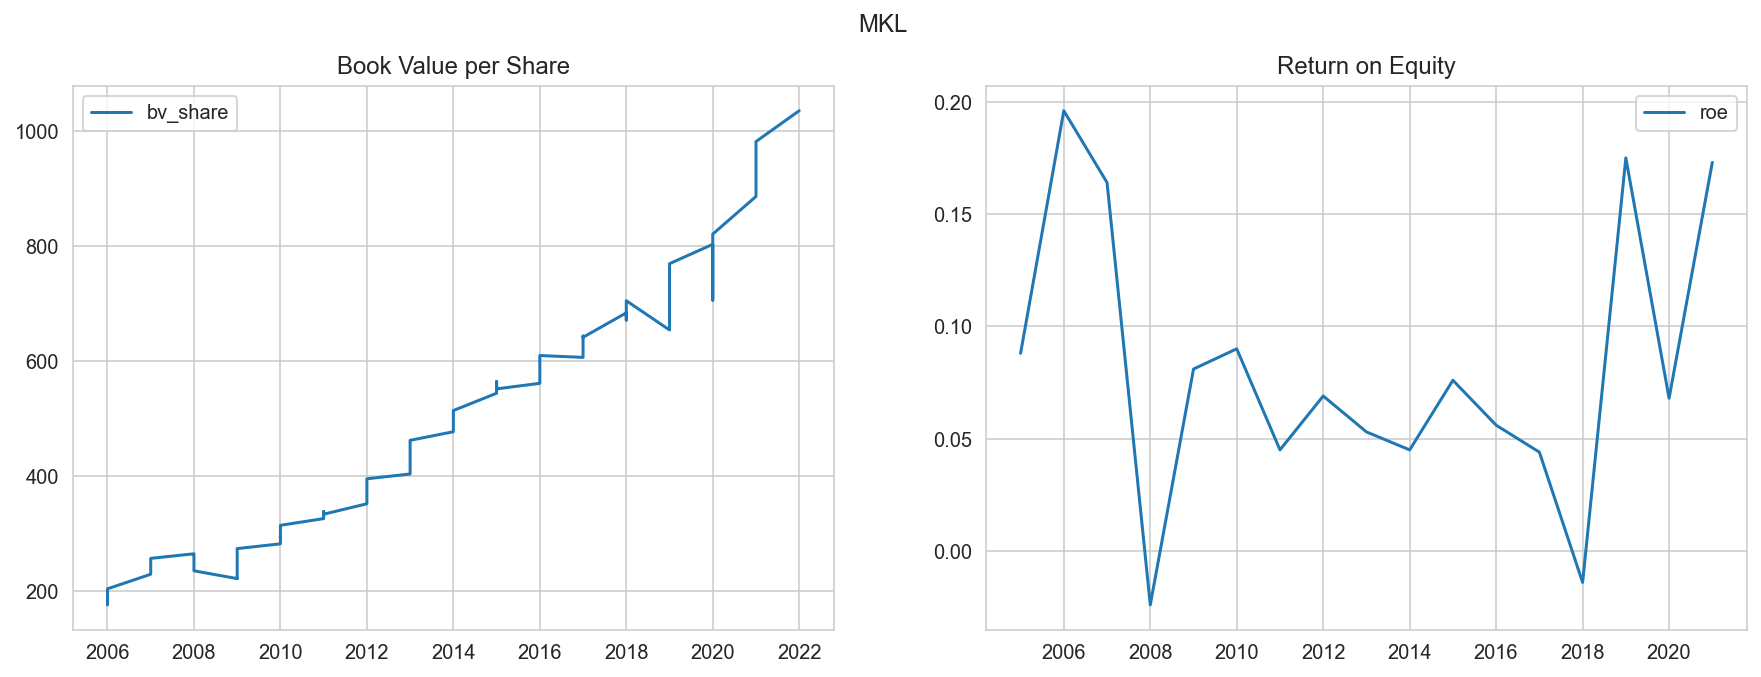

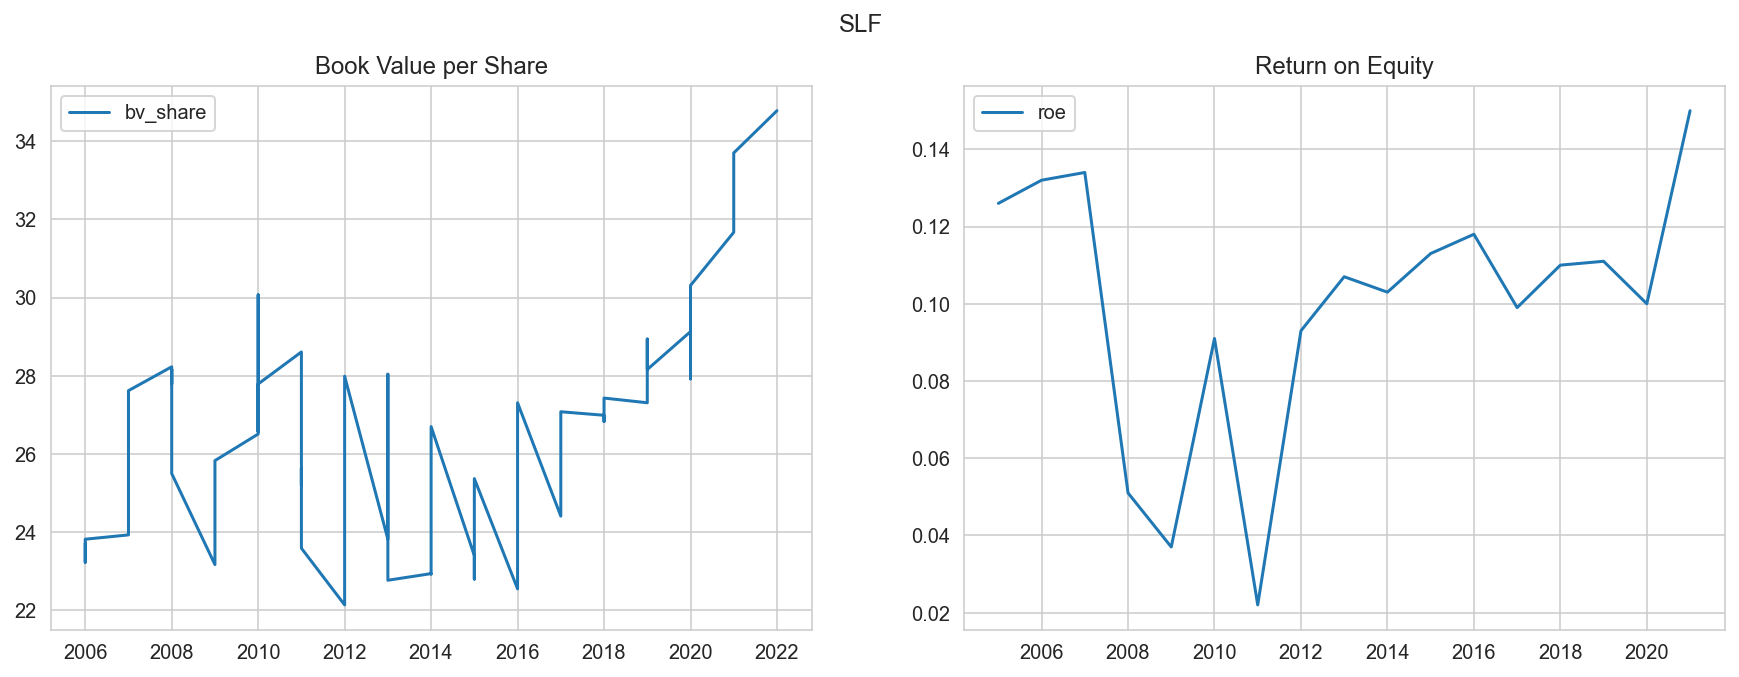

<IPython.core.display.Javascript object>

In [8]:
for key, value in all_data.items():
    plot_financials(value, key)

### Growth Forecasts

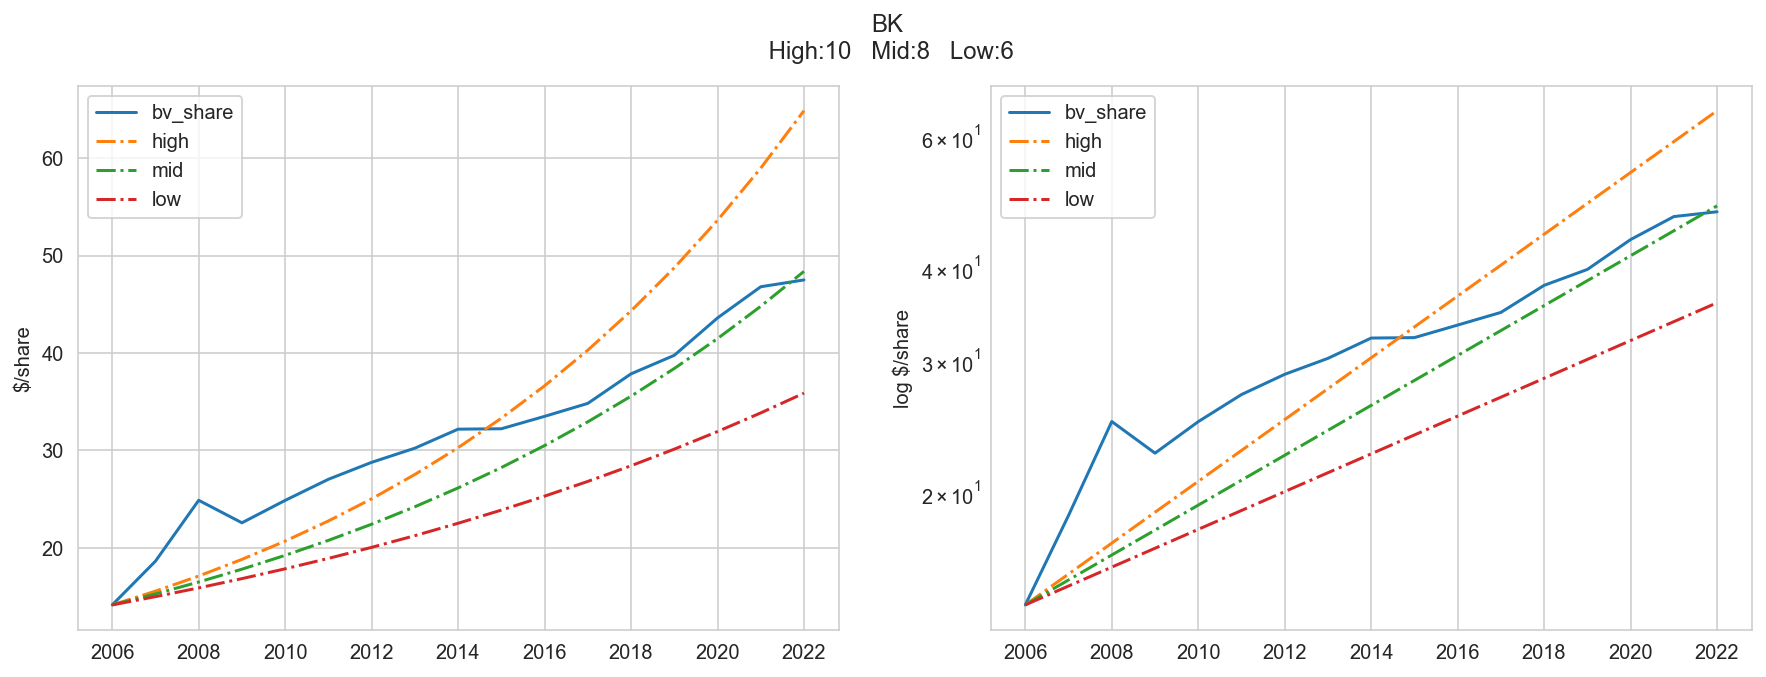

<IPython.core.display.Javascript object>

In [16]:
sensitivity_plot(company_data, "BK", 10, 8, 6, "bv")

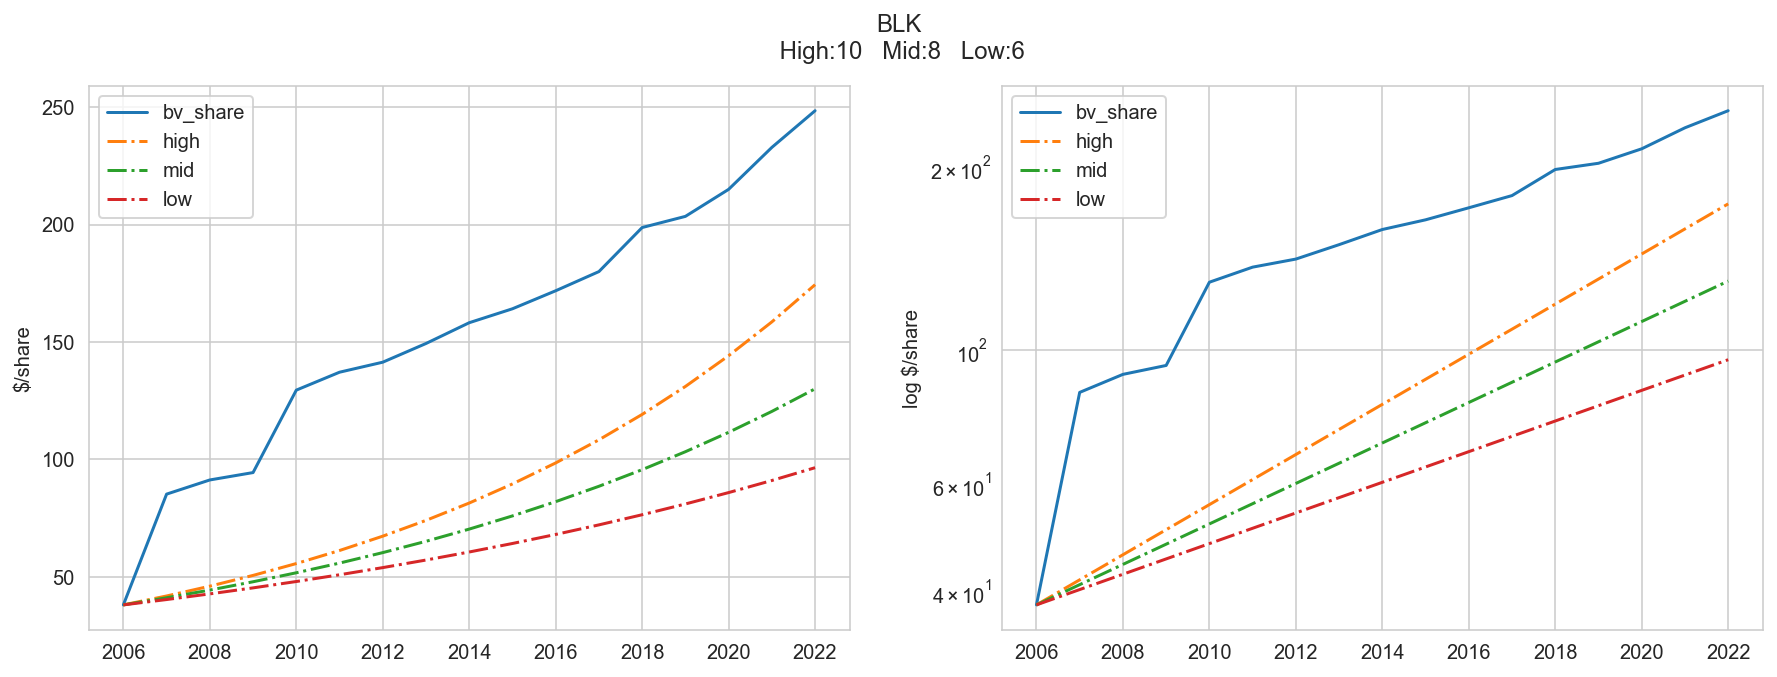

<IPython.core.display.Javascript object>

In [9]:
sensitivity_plot(company_data, "BLK", 10, 8, 6, "bv")

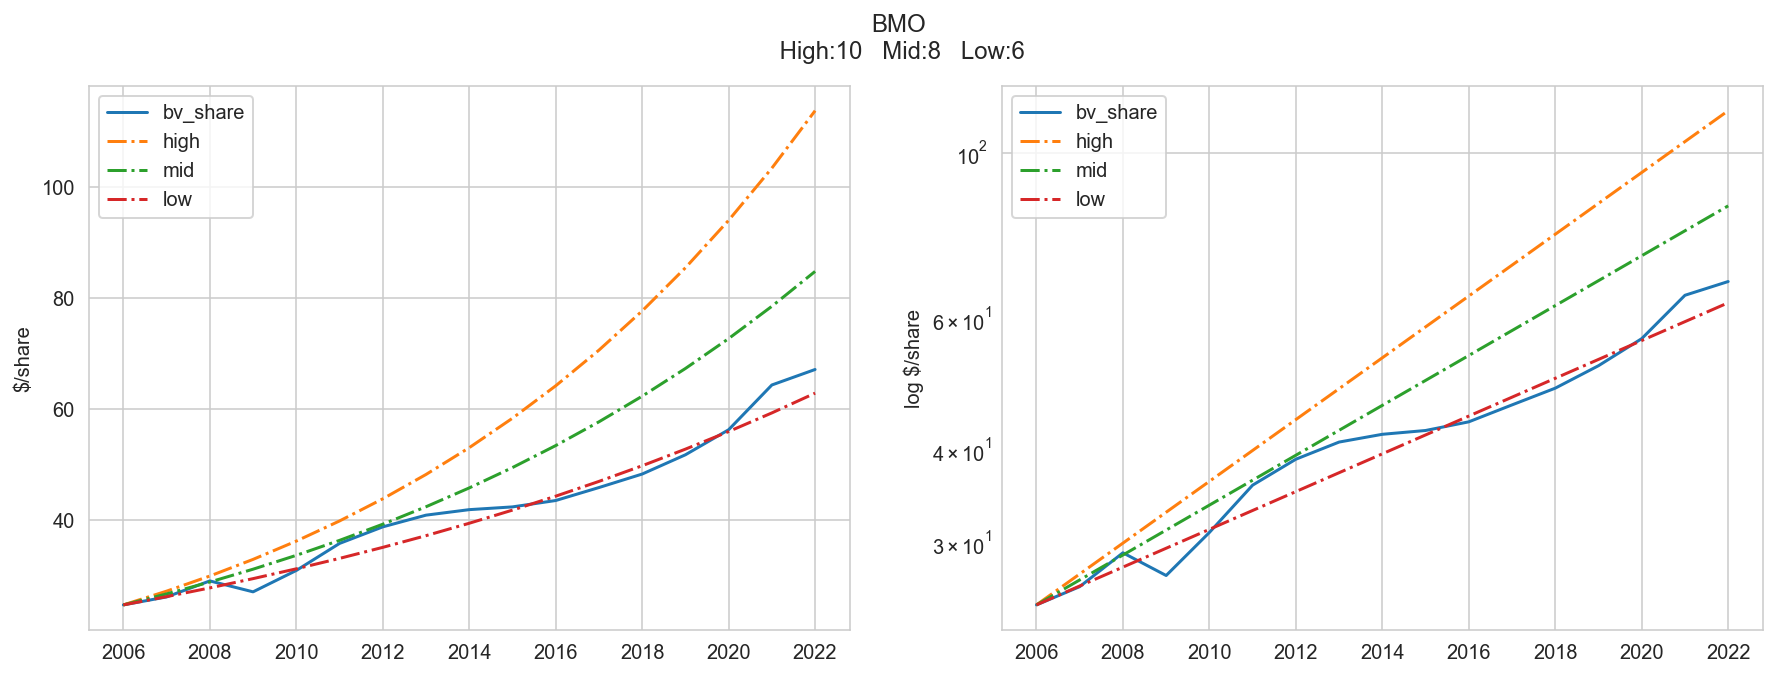

<IPython.core.display.Javascript object>

In [17]:
sensitivity_plot(company_data, "BMO", 10, 8, 6, "bv")

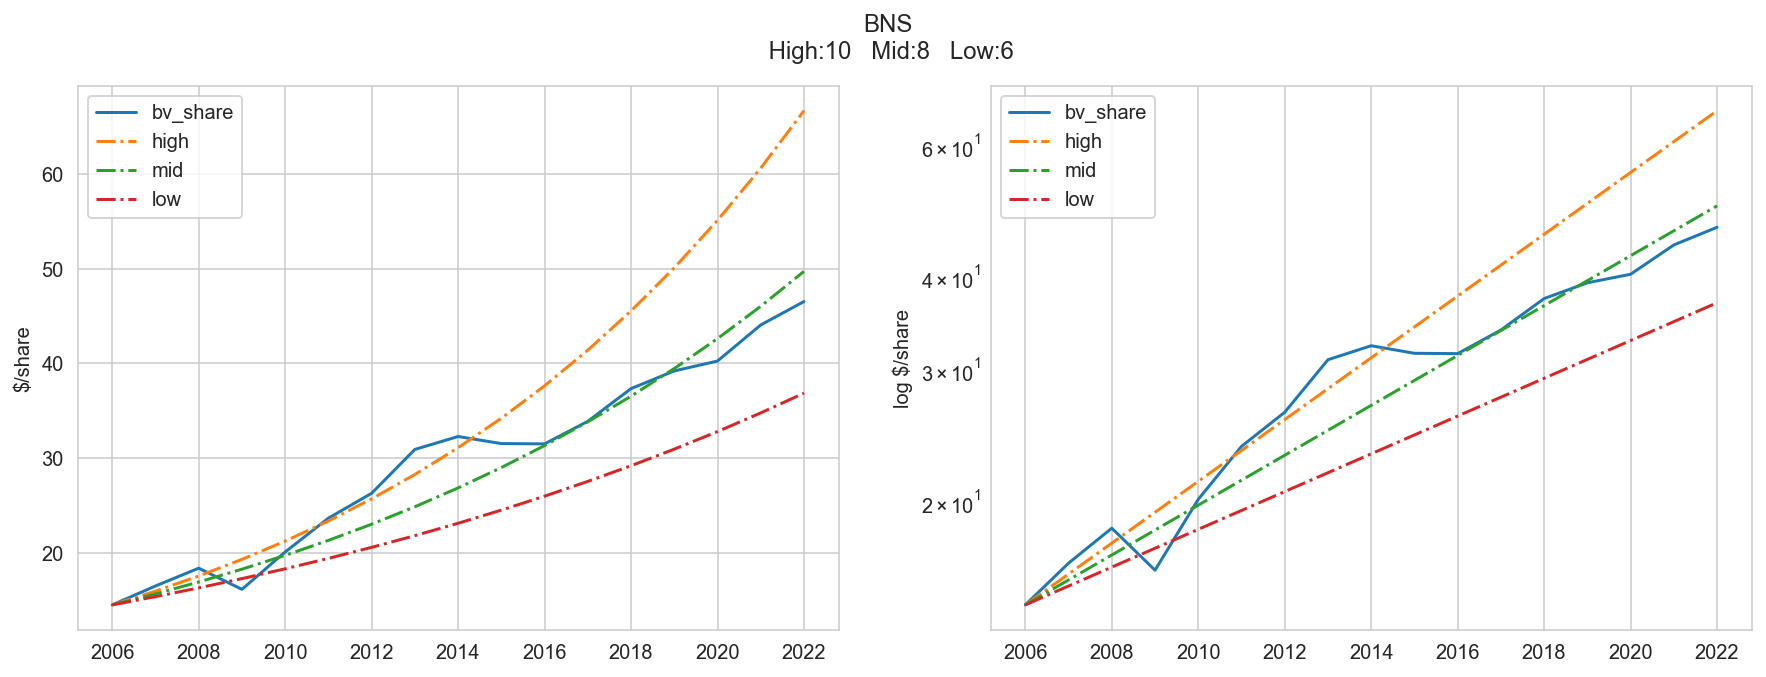

<IPython.core.display.Javascript object>

In [18]:
sensitivity_plot(company_data, "BNS", 10, 8, 6, "bv")

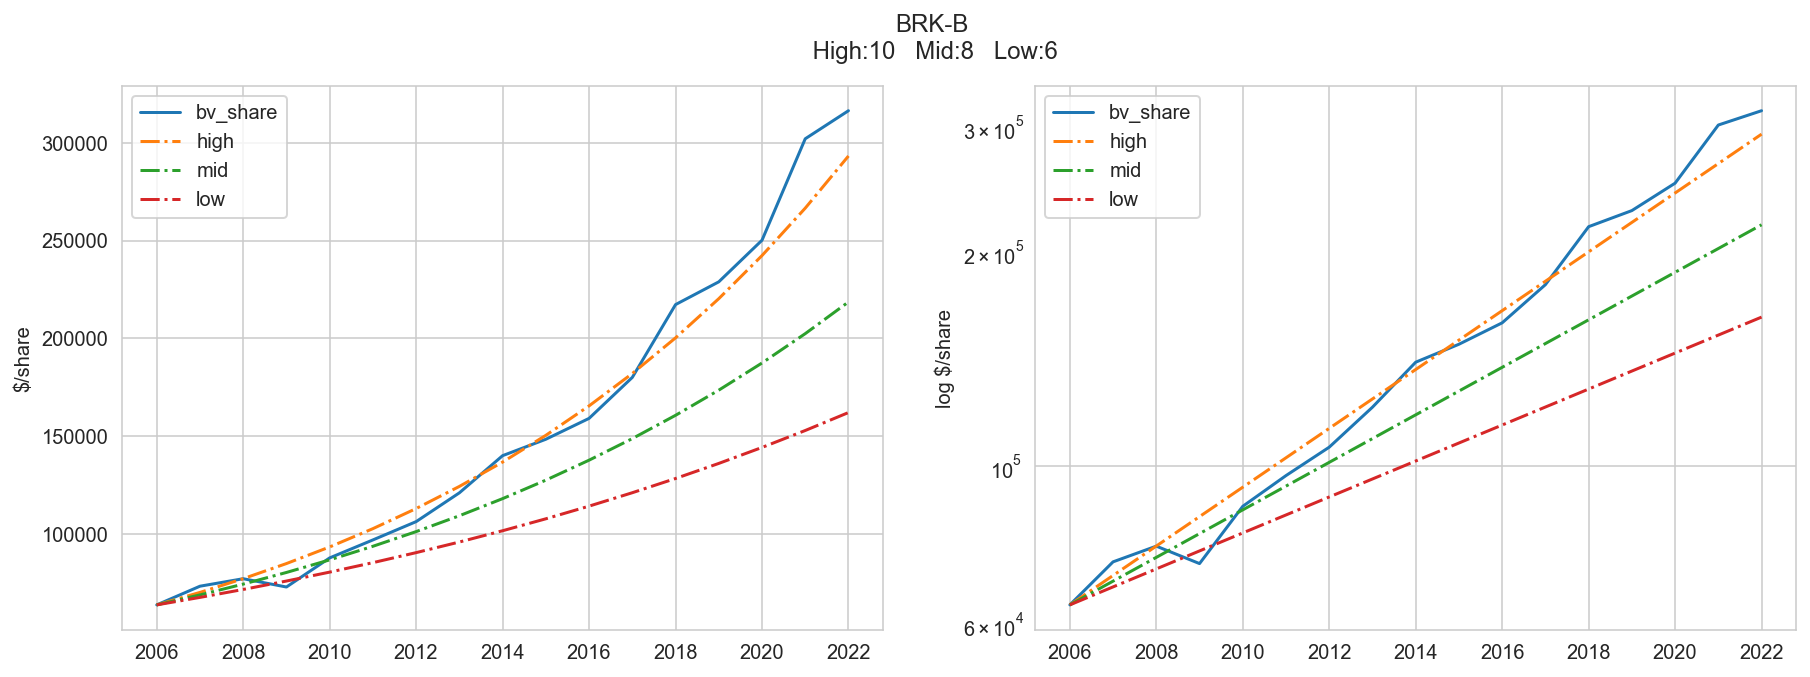

<IPython.core.display.Javascript object>

In [19]:
sensitivity_plot(company_data, "BRK-B", 10, 8, 6, "bv")

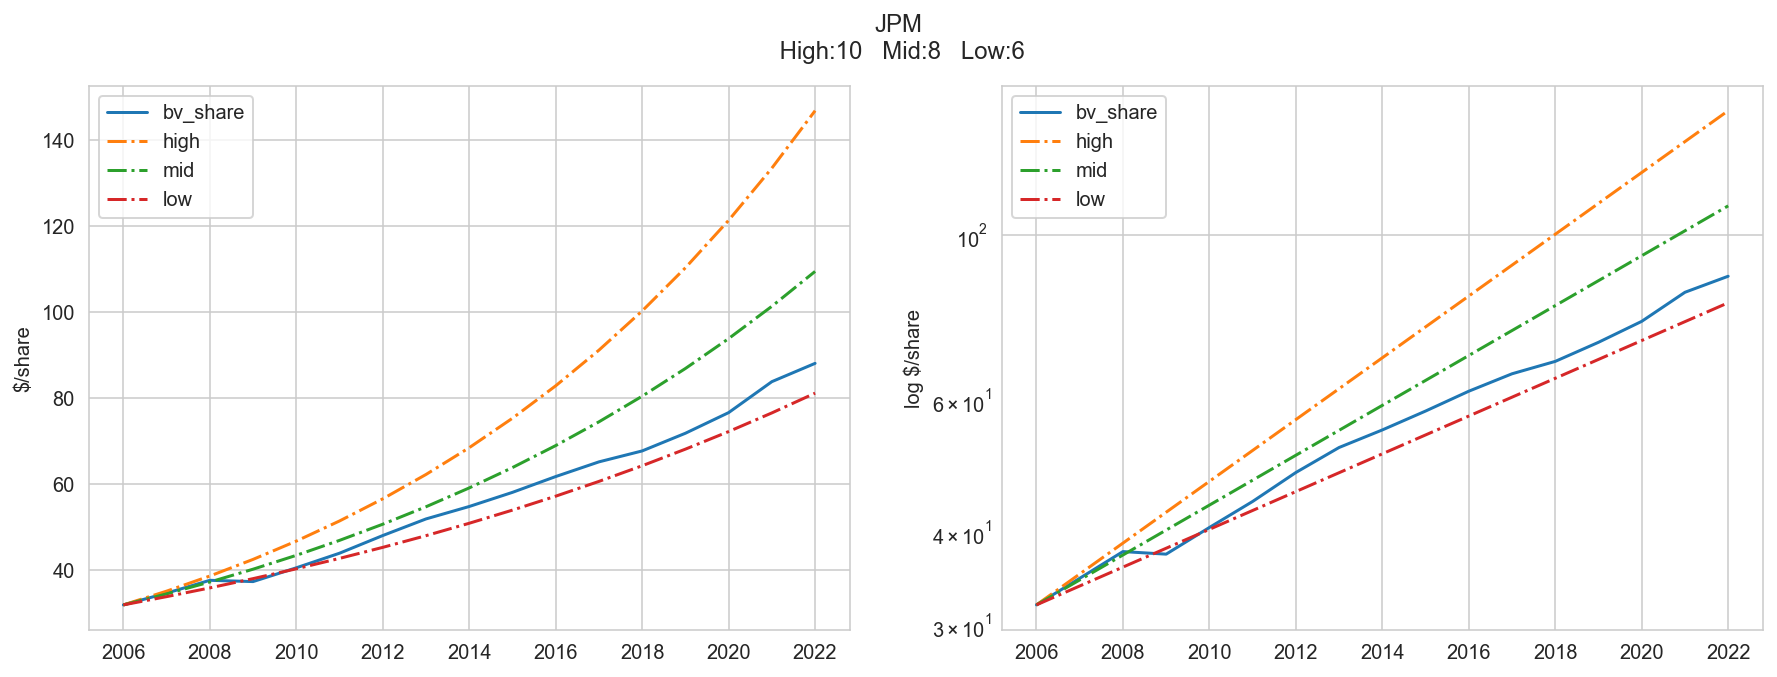

<IPython.core.display.Javascript object>

In [20]:
sensitivity_plot(company_data, "JPM", 10, 8, 6, "bv")

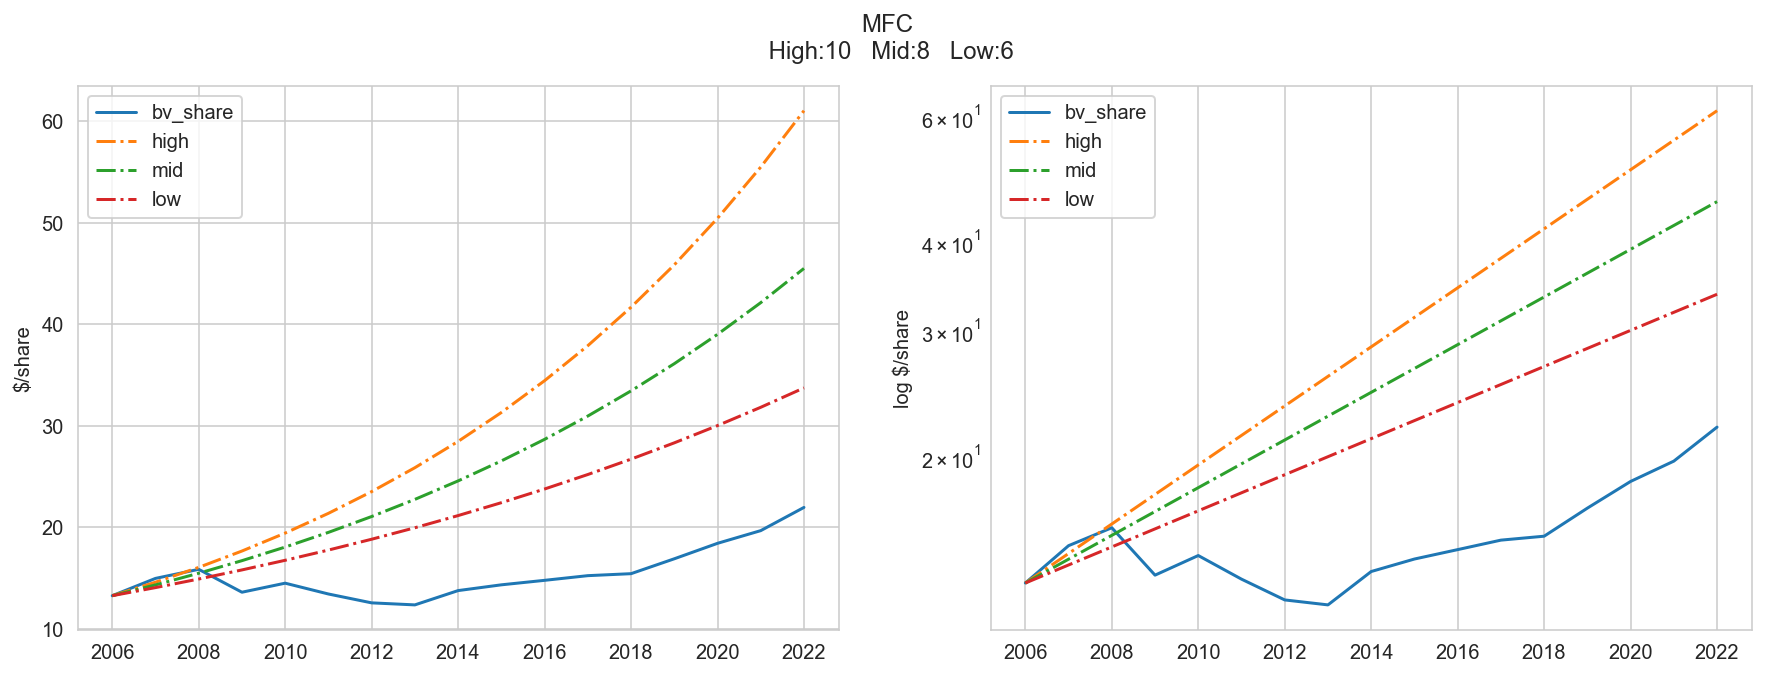

<IPython.core.display.Javascript object>

In [21]:
sensitivity_plot(company_data, "MFC", 10, 8, 6, "bv")

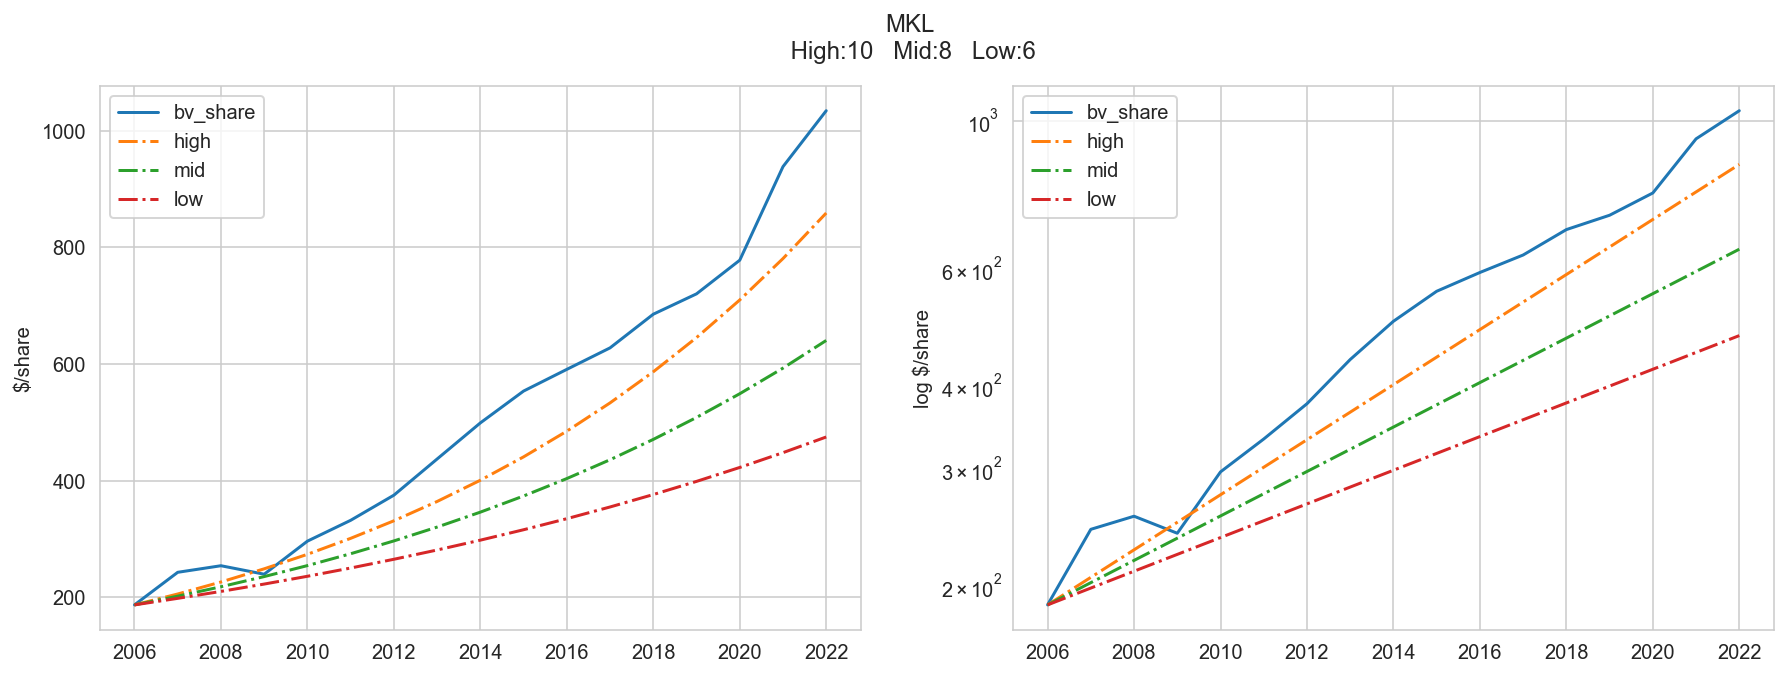

<IPython.core.display.Javascript object>

In [22]:
sensitivity_plot(company_data, "MKL", 10, 8, 6, "bv")

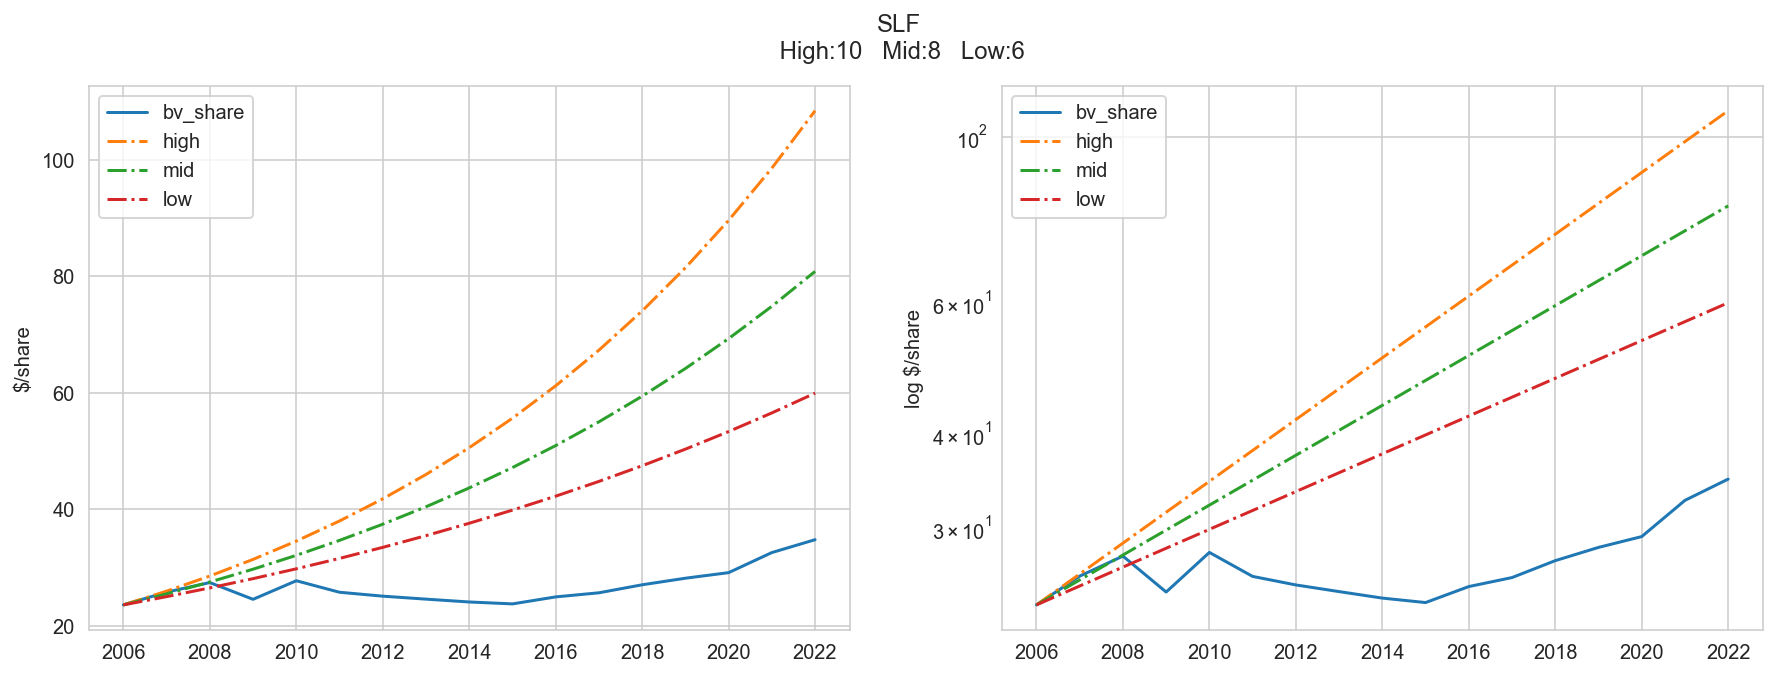

<IPython.core.display.Javascript object>

In [23]:
sensitivity_plot(company_data, "SLF", 10, 8, 6, "bv")

### Starting Point Values

In [10]:
# Create a dictionary of starting values for each company
starting_dict = {}
for key, value in company_data.items():
    try:
        starting_dict[key] = value.loc[value.last_valid_index(), "bv_share"]

    except:
        print(key)

<IPython.core.display.Javascript object>

In [11]:
# Transform the dictionary to a dataframe of start values
df_start = pd.DataFrame.from_dict(
    data=starting_dict, orient="index", columns=["start_value"]
)
df_out = df_start.reset_index().rename(columns={"index": "ticker"})

<IPython.core.display.Javascript object>

In [12]:
# View latest start values
df_out

,ticker,start_value
0,BK,47.50
1,BLK,248.50
2,BMO,67.16
3,BNS,46.53
4,BRK-B,316350.56
5,JPM,88.07
6,MFC,21.97
7,MKL,1034.56
8,SLF,34.78


<IPython.core.display.Javascript object>

In [13]:
# Override FCF values if needed
# ticker = 'AMZN'
# starting_dict[ticker] = 30 # Assumption: the FCF will jump back to trend prior to covid

# # Transform the dictionary to a dataframe of start values
# df_start = pd.DataFrame.from_dict(
#             data=starting_dict, orient="index", columns=["start_value"]
#         )
# df_out=df_start.reset_index().rename(columns={'index':'ticker'})

<IPython.core.display.Javascript object>

In [14]:
# Final check
df_out

,ticker,start_value
0,BK,47.50
1,BLK,248.50
2,BMO,67.16
3,BNS,46.53
4,BRK-B,316350.56
5,JPM,88.07
6,MFC,21.97
7,MKL,1034.56
8,SLF,34.78


<IPython.core.display.Javascript object>

In [15]:
# Export to disk
df_out.to_csv(output_data / start_file, index=False)

<IPython.core.display.Javascript object>